# Challenge 1 - Regression
**Analysis Summary**

This analysis aims to predict Price given a set of observed regressors by building statistical models. The methodologies used in this analysis are linear regression and random forest methodology. 

 The multi regression model has poor performance given that the relationships between Price and other regressors are non-linear. The random forest method has better performance with R-square of 64% in test data. In addition, the random forest models consider two transformations of target variables: Price and Log of Price. Both in-sample and out of sample test results indicated that the model with log transformation of the target variable performs better. 
 
 Detail analysis code, as well as results, are shown below:
* Note 1 Regression Challenge Data Exploration
* Note 2 Linear Regression with Stepwise Selection 
* Note 3 Random Forest on Original Price
* Note 4 Random Forest on Log of Price

In [17]:
# Import library
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization
from scipy import stats
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

Import Data:

In [5]:
# Import dataset
#path ='dataset/'
path = 'C:/Users/czlni/Desktop/master/DS Exericise/assets/regression/'
df = pd.read_csv(path+'challenge1.csv')
print('\nNumber of rows and columns in the data set: ',df.shape)
print('')

#look into top few rows and columns in the dataset
df.head()

# there are  10000  training exaple and  n=7  independent variable. 
#The target variable here is Price 
#Remaining six variables such as loc1, loc2, para1, para2, para3, para4, dow are independent variable. 


Number of rows and columns in the data set:  (10000, 8)



,loc1,loc2,para1,dow,para2,para3,para4,price
0,0,01,1,Mon,662,3000.0,3.8,73.49
1,9,99,1,Thu,340,2760.0,9.2,300.00
2,0,04,0,Mon,16,2700.0,3.0,130.00
3,4,40,1,Mon,17,12320.0,6.4,365.00
4,5,50,1,Thu,610,2117.0,10.8,357.50


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
loc1     10000 non-null object
loc2     10000 non-null object
para1    10000 non-null int64
dow      10000 non-null object
para2    10000 non-null int64
para3    10000 non-null float64
para4    10000 non-null float64
price    10000 non-null float64
dtypes: float64(3), int64(2), object(3)
memory usage: 625.1+ KB


In [7]:
df.describe()

,para1,para2,para3,para4,price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.380800,447.384000,9547.989920,8.459522,433.733056
std,3.500831,221.005861,8022.814037,4.613526,277.435947
min,0.000000,16.000000,200.000000,1.000000,50.730000
25%,1.000000,301.000000,2898.000000,4.000000,250.000000
50%,1.000000,434.000000,6447.000000,7.200000,370.000000
75%,1.000000,582.000000,15000.000000,13.600000,550.000000
max,337.000000,2554.000000,34782.000000,27.200000,5700.000000


The table above shows that all the numeric variables have extreme values

In [8]:
unique_loc2=df['loc2'].unique()
#sort values smallest to largest
unique_loc2.sort()

#display sorted values
unique_loc2

array(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '0B',
       '0C', '0L', '0N', '0T', '10', '11', '12', '13', '14', '15', '16',
       '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27',
       '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38',
       '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49',
       '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71',
       '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82',
       '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93',
       '94', '95', '96', '97', '98', '99', 'S6', 'TS'], dtype=object)

Result above shows that variable loc2 has over 100 distinct values


In [10]:
unique_dow=df['dow'].unique()
unique_dow

array(['Mon', 'Thu', 'Tue', 'Wed', 'Fri', 'Sat', 'Sun'], dtype=object)

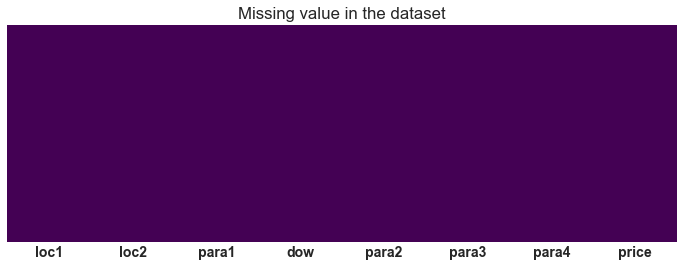

In [11]:
# Check missing
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');
#There is no missing value in the dataset

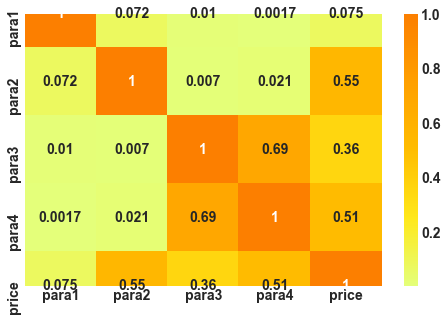

In [12]:
# correlation plot
corr = df.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

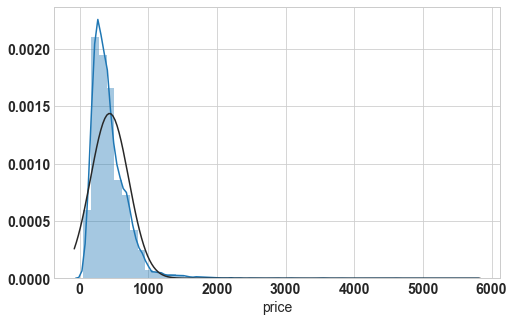

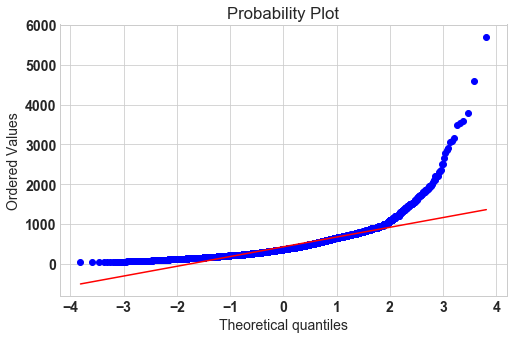

In [24]:
## Check distribution for dependent varibale
#histogram and normal probability plot
from scipy.stats import norm
sns.distplot(df['price'],fit=norm)
fig = plt.figure()
res = stats.probplot(df['price'], plot=plt)

The price is not normally distributed: The data has right-skewness.Log transform on Price is applied below.

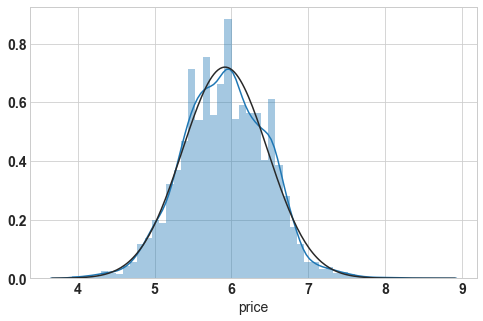

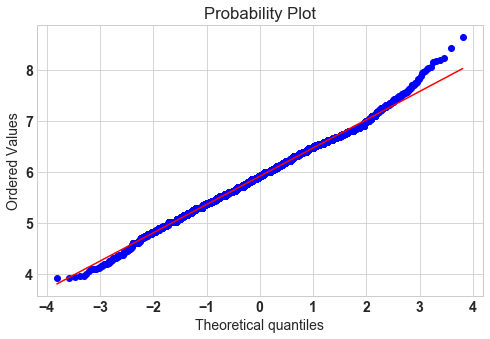

In [25]:
log_price = np.log(df['price'])
sns.distplot(log_price,fit=norm);
fig = plt.figure()
res = stats.probplot(log_price, plot=plt)


It looks much more normal now. Considering building models on the original price or log of price.
Below are the checks for categorical data and see if any patterns are found.

Text(0.5, 1.0, 'Price by Loc1')

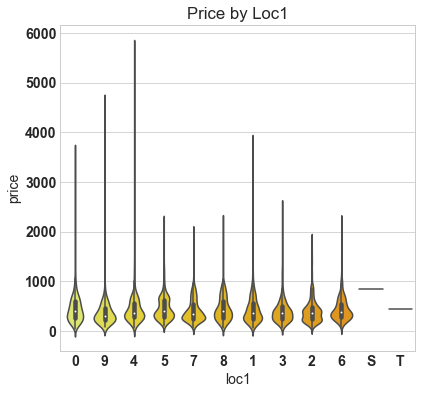

In [32]:
# Check price by segmentations
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.violinplot(x='loc1', y='price',data=df,palette='Wistia',ax=ax)
ax.set_title('Price by Loc1')

Text(0.5, 1.0, 'Price by Loc2')

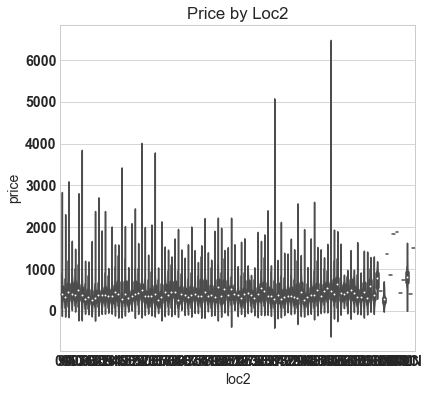

In [33]:
# Check price by segmentations
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.violinplot(x='loc2', y='price',data=df,palette='Wistia',ax=ax)
ax.set_title('Price by Loc2')

Text(0.5, 1.0, 'Price by dow')

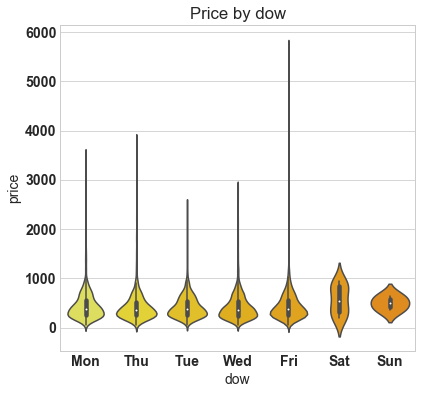

In [34]:
# Check price by segmentations
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.violinplot(x='dow', y='price',data=df,palette='Wistia',ax=ax)
ax.set_title('Price by dow')

In [35]:
df.groupby(df.dow).agg(['mean','min','max'])['price']

,mean,min,max
dow,,,
Fri,448.578431,52.30,5700.0
Mon,446.891825,57.72,3500.0
Sat,563.750000,187.50,950.0
Sun,500.000000,350.00,650.0
Thu,422.121279,50.73,3800.0
Tue,432.778803,50.88,2500.0
Wed,419.696785,51.92,2850.0


Price by categorical variables has no significant patterns. No significant differences in the means of each category are seen based on visualization. One variable to indicate weekdays or weekends is created.

Given Loc2 has over 100 levels of values, machine learning algorithms cannot directly work with it. Categorical variables are converted into binary vectors. 

In [37]:
# Dummy variable
categorical_columns = ['loc1','loc2', 'dow']
df_encode1 = pd.get_dummies(data = df['loc1'], prefix = 'loc1', prefix_sep='_',
               columns = categorical_columns,
               drop_first =True,
              dtype='int8')

df_encode2 = pd.get_dummies(data = df['loc2'], prefix = 'loc2', prefix_sep='_',
               columns = categorical_columns,
               drop_first =True,
              dtype='int8')

df_encode3 = pd.get_dummies(data = df['dow'], prefix = 'dow', prefix_sep='_',
               columns = categorical_columns,
               drop_first =True,
              dtype='int8')

df_numeric=df[['para1','para2', 'para3', 'para4', 'price']]
df_encode = pd.concat([df_encode1,df_encode2,df_encode3,df_numeric],axis=1)
df_encode['weekend']=np.where((df['dow'] =='Sat')|(df['dow'] =='Sun'),1,0)

In [38]:
# Lets verify the dummay variable process
print('Columns in original data frame:\n',df.columns.values)
print('\nNumber of rows and columns in the dataset:',df.shape)
print('\nColumns in data frame after encoding dummy variable:\n',df_encode.columns.values)
print('\nNumber of rows and columns in the dataset:',df_encode.shape)

Columns in original data frame:
 ['loc1' 'loc2' 'para1' 'dow' 'para2' 'para3' 'para4' 'price']

Number of rows and columns in the dataset: (10000, 8)

Columns in data frame after encoding dummy variable:
 ['loc1_1' 'loc1_2' 'loc1_3' 'loc1_4' 'loc1_5' 'loc1_6' 'loc1_7' 'loc1_8'
 'loc1_9' 'loc1_S' 'loc1_T' 'loc2_01' 'loc2_02' 'loc2_03' 'loc2_04'
 'loc2_05' 'loc2_06' 'loc2_07' 'loc2_08' 'loc2_09' 'loc2_0B' 'loc2_0C'
 'loc2_0L' 'loc2_0N' 'loc2_0T' 'loc2_10' 'loc2_11' 'loc2_12' 'loc2_13'
 'loc2_14' 'loc2_15' 'loc2_16' 'loc2_17' 'loc2_18' 'loc2_19' 'loc2_20'
 'loc2_21' 'loc2_22' 'loc2_23' 'loc2_24' 'loc2_25' 'loc2_26' 'loc2_27'
 'loc2_28' 'loc2_29' 'loc2_30' 'loc2_31' 'loc2_32' 'loc2_33' 'loc2_34'
 'loc2_35' 'loc2_36' 'loc2_37' 'loc2_38' 'loc2_39' 'loc2_40' 'loc2_41'
 'loc2_42' 'loc2_43' 'loc2_44' 'loc2_45' 'loc2_46' 'loc2_47' 'loc2_48'
 'loc2_49' 'loc2_50' 'loc2_51' 'loc2_52' 'loc2_53' 'loc2_54' 'loc2_55'
 'loc2_56' 'loc2_57' 'loc2_58' 'loc2_59' 'loc2_60' 'loc2_61' 'loc2_62'
 'loc2_63' 'loc

In [42]:
## Log transform
df_encode['log_price'] = np.log(df_encode['price'])
df_encode['price']=df['price']
df_Sklearn=df_encode.drop(columns=['log_price'])


In [46]:
df_Sklearn.to_csv('C:/Users/czlni/Desktop/df_Sklearn.csv', index=False)
df_encode.to_csv('C:/Users/czlni/Desktop/df_encode.csv', index=False)